In [1]:
# importing the libraries (dependencies)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications import VGG19
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [2]:
!gdown 1SNuCV4FiugMdbDdkXMH8Cj-09-r-EjlI

Downloading...
From: https://drive.google.com/uc?id=1SNuCV4FiugMdbDdkXMH8Cj-09-r-EjlI
To: /content/images.zip
100% 32.2M/32.2M [00:00<00:00, 34.0MB/s]


In [3]:
!unzip images.zip

Archive:  images.zip
  inflating: images/0.jpg            
  inflating: images/1.jpg            
  inflating: images/10.jpg           
  inflating: images/100.jpg          
  inflating: images/1000.jpg         
  inflating: images/1001.jpg         
  inflating: images/1002.jpg         
  inflating: images/1003.jpg         
  inflating: images/1004.jpg         
  inflating: images/1005.jpg         
  inflating: images/1006.jpg         
  inflating: images/1007.jpg         
  inflating: images/1008.jpg         
  inflating: images/1009.jpg         
  inflating: images/101.jpg          
  inflating: images/1010.jpg         
  inflating: images/1011.jpg         
  inflating: images/1012.jpg         
  inflating: images/1013.jpg         
  inflating: images/1014.jpg         
  inflating: images/1015.jpg         
  inflating: images/1016.jpg         
  inflating: images/1017.jpg         
  inflating: images/1018.jpg         
  inflating: images/1019.jpg         
  inflating: images/102.jpg  

In [4]:
traindf = pd.read_csv("emergency_train.csv", dtype = str)
traindf.head(10)

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
5,45.jpg,1
6,2313.jpg,0
7,1657.jpg,0
8,294.jpg,1
9,999.jpg,0


In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255., validation_split = 0.10)


In [7]:
valid_datagen = ImageDataGenerator(rescale = 1./255., validation_split = 0.15)

In [8]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="images",
    x_col='image_names',
    y_col='emergency_or_not',
    subset= "training",
    batch_size=16,
    seed=42,
    shuffle=True,
    class_mode="binary",
    target_size=(224, 224)
)

Found 1646 validated image filenames belonging to 2 classes.


In [9]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="images",
    x_col='image_names',
    y_col='emergency_or_not',
    subset = 'validation',
    batch_size=16,
    seed=42,
    shuffle = True,
    class_mode="binary",
    target_size=(224, 224)
)

Found 164 validated image filenames belonging to 2 classes.


In [10]:
valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=traindf,
    directory="images",
    x_col='image_names',
    y_col='emergency_or_not',
    subset= "validation",
    batch_size=16,
    seed=42,
    shuffle=True,
    class_mode="binary",
    target_size=(224, 224)
)

Found 246 validated image filenames belonging to 2 classes.


In [11]:
# Storing the performance of each of the models into a table
from prettytable import PrettyTable
results = PrettyTable(["Model Name", "Accuracy", "Precision", "Recall", "F1Score"])

#VGG-19

In [12]:
# loading the weights of VGG19. These weights are trainable on the imagenet dataset
vgg= VGG19(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output)

#adding the final output layer for binary classifications
x = Dense(1, activation = 'sigmoid')(x)

model = Model(inputs = vgg.input, outputs = x, name = "VGG19")

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','Precision','Recall'])

80134624/80134624 [==============================] - 0s 0us/step


In [13]:
model.summary()

Model: "VGG19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
train_generator.class_indices

{'0': 0, '1': 1}

In [15]:
history = model.fit(train_generator, epochs=5, validation_data = valid_generator)

Epoch 1/5
103/103 [==============================] - 37s 259ms/step - loss: 0.4262 - accuracy: 0.8074 - precision: 0.7862 - recall: 0.7342 - val_loss: 0.2190 - val_accuracy: 0.9106 - val_precision: 0.9065 - val_recall: 0.8899
Epoch 2/5
103/103 [==============================] - 23s 227ms/step - loss: 0.2244 - accuracy: 0.9077 - precision: 0.9038 - recall: 0.8693 - val_loss: 0.2145 - val_accuracy: 0.9228 - val_precision: 0.8571 - val_recall: 0.9908
Epoch 3/5
103/103 [==============================] - 28s 277ms/step - loss: 0.2018 - accuracy: 0.9192 - precision: 0.9102 - recall: 0.8928 - val_loss: 0.1327 - val_accuracy: 0.9553 - val_precision: 0.9083 - val_recall: 1.0000
Epoch 4/5
103/103 [==============================] - 24s 229ms/step - loss: 0.1966 - accuracy: 0.9228 - precision: 0.9110 - recall: 0.9016 - val_loss: 0.1111 - val_accuracy: 0.9593 - val_precision: 0.9231 - val_recall: 0.9908
Epoch 5/5
103/103 [==============================] - 23s 225ms/step - loss: 0.1338 - accuracy: 0

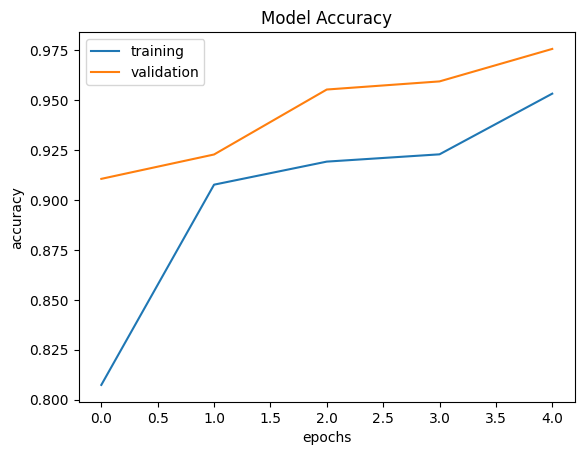

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model Accuracy')
plt.legend(['training','validation'],loc='best')
plt.show()

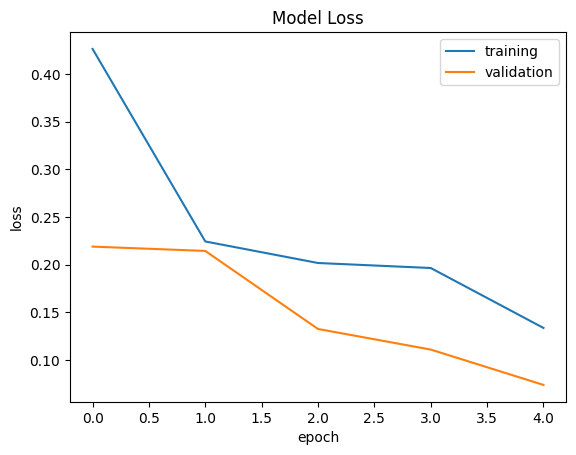

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel("loss")
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

In [18]:
scores = model.evaluate(test_generator,steps=50)
print("Accuracy: ",scores[1]*100)
#print(scores)
precision = scores[2]
recall = scores[3]
F1Score = 2*precision*recall/(precision+recall)
print("F1-Score: ", F1Score)

results.add_row(["VGG19", round(scores[1],3), round(precision,3), round(recall,3), round(F1Score,3)])

import pickle
pickle.dump(model,open('VGG19.pkl','wb'))

11/50 [=====>........................] - ETA: 6s - loss: 0.0742 - accuracy: 0.9756 - precision: 0.9524 - recall: 0.9836

50/50 [==============================] - 2s 42ms/step - loss: 0.0742 - accuracy: 0.9756 - precision: 0.9524 - recall: 0.9836
Accuracy:  97.56097793579102
F1-Score:  0.9677419464077711


#VGG-16

In [19]:
# loading the weights of VGG16. These weights are trainable on the imagenet dataset
from keras.applications import VGG16
vgg16= VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

for layer in vgg16.layers:
  layer.trainable = False

x = Flatten()(vgg16.output)

#adding the final output layer for binary classifications
x = Dense(1, activation = 'sigmoid')(x)

model = Model(inputs = vgg16.input, outputs = x,name="VGG-16")

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','Precision','Recall'])

58889256/58889256 [==============================] - 0s 0us/step


In [20]:
model.summary()

Model: "VGG-16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0    

In [21]:
history = model.fit(train_generator, epochs = 5, validation_data = valid_generator)

Epoch 1/5
103/103 [==============================] - 25s 234ms/step - loss: 0.3910 - accuracy: 0.8262 - precision: 0.8006 - recall: 0.7724 - val_loss: 0.1950 - val_accuracy: 0.9268 - val_precision: 0.8889 - val_recall: 0.9541
Epoch 2/5
103/103 [==============================] - 33s 320ms/step - loss: 0.2111 - accuracy: 0.9210 - precision: 0.9206 - recall: 0.8855 - val_loss: 0.1287 - val_accuracy: 0.9553 - val_precision: 0.9298 - val_recall: 0.9725
Epoch 3/5
103/103 [==============================] - 23s 225ms/step - loss: 0.1631 - accuracy: 0.9441 - precision: 0.9389 - recall: 0.9251 - val_loss: 0.1117 - val_accuracy: 0.9634 - val_precision: 0.9808 - val_recall: 0.9358
Epoch 4/5
103/103 [==============================] - 24s 230ms/step - loss: 0.1324 - accuracy: 0.9520 - precision: 0.9466 - recall: 0.9369 - val_loss: 0.1237 - val_accuracy: 0.9472 - val_precision: 0.9000 - val_recall: 0.9908
Epoch 5/5
103/103 [==============================] - 23s 224ms/step - loss: 0.1248 - accuracy: 0

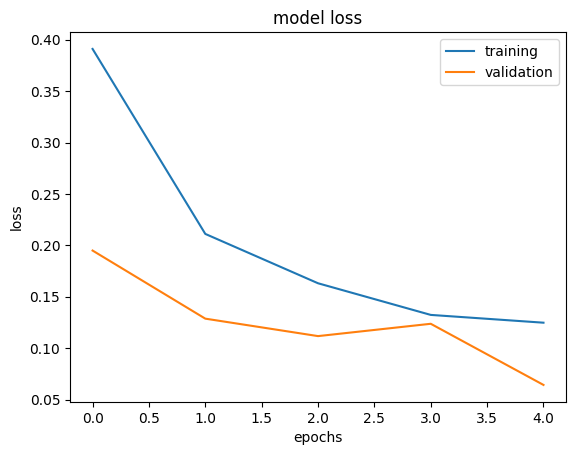

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='best')
plt.show()

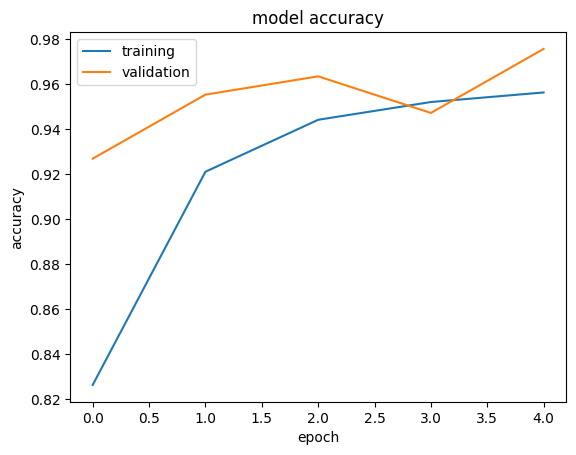

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel("accuracy")
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

In [24]:
scores = model.evaluate(test_generator,steps=50)
print("Accuracy: ",scores[1]*100)
#print(scores)
precision = scores[2]
recall = scores[3]
F1Score = 2*precision*recall/(precision+recall)
print("F1-Score: ",F1Score)

# Add rows
results.add_row(["VGG16", round(scores[1],3), round(precision,3), round(recall,3), round(F1Score,3)])

import pickle
pickle.dump(model,open('VGG16.pkl','wb'))

10/50 [=====>........................] - ETA: 2s - loss: 0.0666 - accuracy: 0.9688 - precision: 0.9242 - recall: 1.0000

50/50 [==============================] - 1s 14ms/step - loss: 0.0670 - accuracy: 0.9695 - precision: 0.9242 - recall: 1.0000
Accuracy:  96.95122241973877
F1-Score:  0.960629928089118


#ResNet-50

In [25]:
from keras.applications import ResNet50
resnet = ResNet50(include_top=False, input_shape=(224,224,3), classes=2, weights='imagenet')

for layer in model.layers:
  layer.trainable=False

x = Flatten()(resnet.output)

output = Dense(1,activation = 'sigmoid')(x)

model = Model(inputs = resnet.inputs, outputs = output, name="ResNet50")

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','Precision','Recall'])

94765736/94765736 [==============================] - 0s 0us/step


In [26]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [27]:
history = model.fit(train_generator, epochs = 5, validation_data = valid_generator)

Epoch 1/5
103/103 [==============================] - 73s 298ms/step - loss: 3.8750 - accuracy: 0.7242 - precision: 0.6870 - recall: 0.6123 - val_loss: 2281.4341 - val_accuracy: 0.4837 - val_precision: 0.4605 - val_recall: 0.9633
Epoch 2/5
103/103 [==============================] - 27s 260ms/step - loss: 0.9647 - accuracy: 0.7831 - precision: 0.7682 - recall: 0.6814 - val_loss: 0.7490 - val_accuracy: 0.5569 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
103/103 [==============================] - 27s 259ms/step - loss: 0.6291 - accuracy: 0.8323 - precision: 0.8149 - recall: 0.7695 - val_loss: 1.1020 - val_accuracy: 0.5569 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
103/103 [==============================] - 28s 270ms/step - loss: 0.4591 - accuracy: 0.8281 - precision: 0.8159 - recall: 0.7548 - val_loss: 1.7517 - val_accuracy: 0.5569 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/5
103/103 [==============================] - 27s 262ms/step -

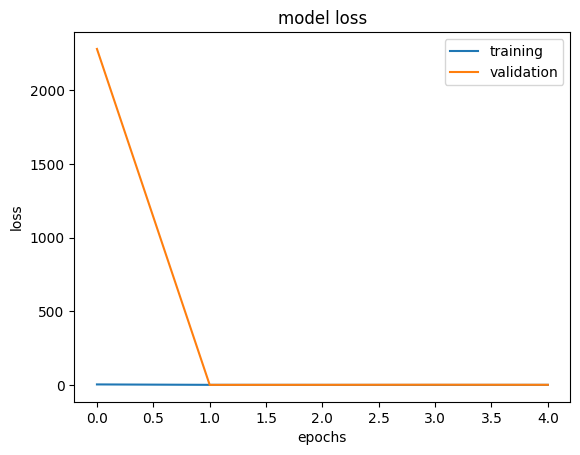

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='best')
plt.show()

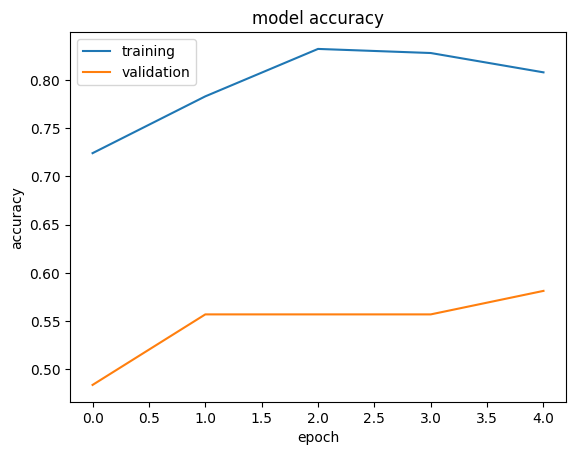

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel("accuracy")
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

In [31]:
scores = model.evaluate(test_generator,steps=50)
print("Accuracy: ",scores[1]*100)
#print(scores)
precision = scores[2]
recall = scores[3]
F1Score = 2*precision*recall/(precision+recall)
print("F1-Score: ",F1Score)

results.add_row(["ResNet50", round(scores[1],3), round(precision,3), round(recall,3), round(F1Score,3)])

import pickle
pickle.dump(model,open('ResNet50.pkl','wb'))

10/50 [=====>........................] - ETA: 2s - loss: 1.1613 - accuracy: 0.6250 - precision: 0.4643 - recall: 0.2241

50/50 [==============================] - 1s 13ms/step - loss: 1.1632 - accuracy: 0.6159 - precision: 0.4643 - recall: 0.2131
Accuracy:  61.58536672592163
F1-Score:  0.2921348282437841


#Inception-V3

In [32]:
from keras.applications import InceptionV3
inc = InceptionV3(include_top=False, input_shape=(224,224,3), classes=2, weights='imagenet')

for layer in inc.layers:
  layer.trainable=False

x = Flatten()(inc.output)

output = Dense(1,activation = 'sigmoid')(x)

model = Model(inputs = inc.inputs, outputs = output, name="Inception-V3")

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','Precision','Recall'])

87910968/87910968 [==============================] - 1s 0us/step


In [33]:
model.summary()

Model: "Inception-V3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [34]:
history = model.fit(train_generator, epochs = 5, validation_data = valid_generator)

Epoch 1/5
103/103 [==============================] - 31s 244ms/step - loss: 0.7800 - accuracy: 0.8858 - precision: 0.8620 - recall: 0.8620 - val_loss: 0.2165 - val_accuracy: 0.9431 - val_precision: 0.9130 - val_recall: 0.9633
Epoch 2/5
103/103 [==============================] - 22s 215ms/step - loss: 0.3989 - accuracy: 0.9235 - precision: 0.9099 - recall: 0.9046 - val_loss: 0.2986 - val_accuracy: 0.9187 - val_precision: 1.0000 - val_recall: 0.8165
Epoch 3/5
103/103 [==============================] - 21s 205ms/step - loss: 0.4728 - accuracy: 0.9313 - precision: 0.9226 - recall: 0.9104 - val_loss: 0.6982 - val_accuracy: 0.9187 - val_precision: 0.8504 - val_recall: 0.9908
Epoch 4/5
103/103 [==============================] - 22s 214ms/step - loss: 0.5942 - accuracy: 0.9368 - precision: 0.9212 - recall: 0.9266 - val_loss: 0.0824 - val_accuracy: 0.9837 - val_precision: 0.9730 - val_recall: 0.9908
Epoch 5/5
103/103 [==============================] - 22s 211ms/step - loss: 0.3376 - accuracy: 0

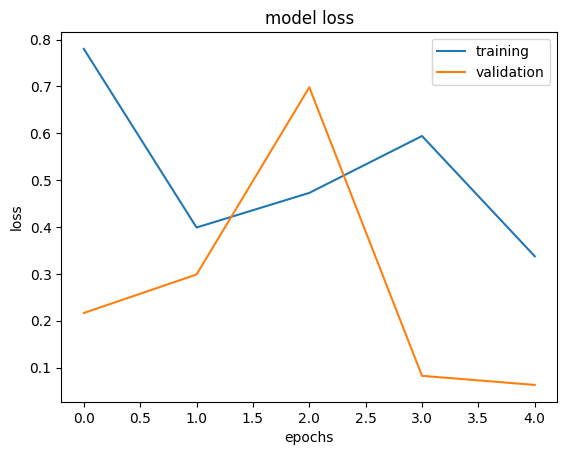

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='best')
plt.show()

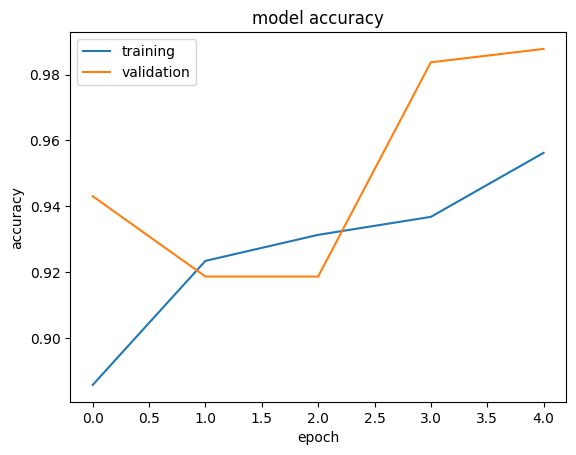

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel("accuracy")
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

In [38]:
scores = model.evaluate(test_generator,steps=50)
print("Accuracy: ",scores[1]*100)
#print(scores)
precision = scores[2]
recall = scores[3]
F1Score = 2*precision*recall/(precision+recall)
print("F1-Score: ",F1Score)

results.add_row(["Inception-V3", round(scores[1],3), round(precision,3), round(recall,3), round(F1Score,3)])

import pickle
pickle.dump(model,open('InceptionV3.pkl','wb'))

10/50 [=====>........................] - ETA: 1s - loss: 0.0807 - accuracy: 0.9875 - precision: 0.9831 - recall: 0.9831

50/50 [==============================] - 1s 10ms/step - loss: 0.0788 - accuracy: 0.9878 - precision: 0.9836 - recall: 0.9836
Accuracy:  98.78048896789551
F1-Score:  0.9836065769195557


#Inception ResNet-V2

In [39]:
from keras.applications import InceptionResNetV2
incresnet = InceptionResNetV2(include_top=False, input_shape=(224,224,3), classes=2, weights='imagenet')

for layer in incresnet.layers:
  layer.trainable=False

x = Flatten()(incresnet.output)

output = Dense(1,activation = 'sigmoid')(x)

model = Model(inputs = incresnet.inputs, outputs = output, name="Inception-V3")

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','Precision','Recall'])

219055592/219055592 [==============================] - 5s 0us/step


In [40]:
model.summary()

Model: "Inception-V3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

In [41]:
history = model.fit(train_generator, epochs = 5, validation_data = valid_generator)

Epoch 1/5
103/103 [==============================] - 45s 308ms/step - loss: 0.5612 - accuracy: 0.9046 - precision: 0.8797 - recall: 0.8913 - val_loss: 0.7133 - val_accuracy: 0.8943 - val_precision: 0.9882 - val_recall: 0.7706
Epoch 2/5
103/103 [==============================] - 24s 235ms/step - loss: 0.5286 - accuracy: 0.9332 - precision: 0.9205 - recall: 0.9178 - val_loss: 0.2474 - val_accuracy: 0.9593 - val_precision: 0.9541 - val_recall: 0.9541
Epoch 3/5
103/103 [==============================] - 24s 237ms/step - loss: 0.3914 - accuracy: 0.9471 - precision: 0.9393 - recall: 0.9325 - val_loss: 0.1032 - val_accuracy: 0.9675 - val_precision: 0.9550 - val_recall: 0.9725
Epoch 4/5
103/103 [==============================] - 24s 235ms/step - loss: 0.3399 - accuracy: 0.9423 - precision: 0.9296 - recall: 0.9310 - val_loss: 0.0322 - val_accuracy: 0.9919 - val_precision: 0.9908 - val_recall: 0.9908
Epoch 5/5
103/103 [==============================] - 24s 233ms/step - loss: 0.2540 - accuracy: 0

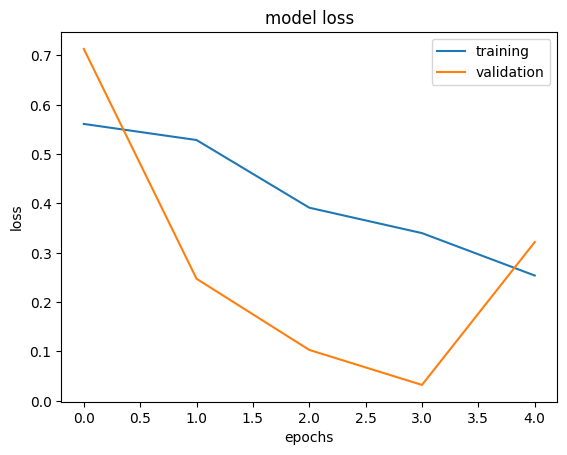

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='best')
plt.show()

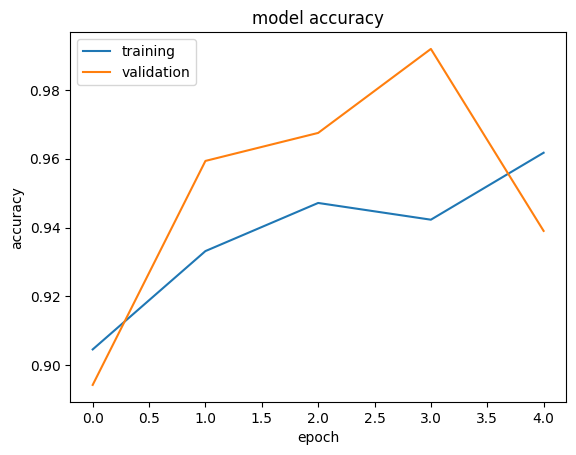

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel("accuracy")
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

In [44]:
scores = model.evaluate(test_generator,steps=50)
print("Accuracy: ",scores[1]*100)
#print(scores)
precision = scores[2]
recall = scores[3]
F1Score = 2*precision*recall/(precision+recall)
print("F1-Score: ",F1Score)

results.add_row(["Inception ResNet-V2", round(scores[1],3), round(precision,3), round(recall,3), round(F1Score,3)])

import pickle
pickle.dump(model,open('InceptionResNetV2.pkl','wb'))

11/50 [=====>........................] - ETA: 5s - loss: 0.2352 - accuracy: 0.9451 - precision: 1.0000 - recall: 0.8525

50/50 [==============================] - 2s 32ms/step - loss: 0.2352 - accuracy: 0.9451 - precision: 1.0000 - recall: 0.8525
Accuracy:  94.51219439506531
F1-Score:  0.920353980592427


#Xception

In [45]:
from keras.applications import InceptionResNetV2
xception = InceptionResNetV2(include_top=False, input_shape=(224,224,3), classes=2, weights='imagenet')

for layer in xception.layers:
  layer.trainable=False

x = Flatten()(xception.output)

output = Dense(1,activation = 'sigmoid')(x)

model = Model(inputs = xception.inputs, outputs = output, name="Inception-V3")

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','Precision','Recall'])

In [46]:
model.summary()

Model: "Inception-V3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_297 (Conv2D)            (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_297 (Batch  (None, 111, 111, 32  96         ['conv2d_297[0][0]']             
 Normalization)                 )                                                      

In [47]:
history = model.fit(train_generator, epochs = 5, validation_data = valid_generator)

Epoch 1/5
103/103 [==============================] - 47s 274ms/step - loss: 0.5276 - accuracy: 0.9119 - precision: 0.8930 - recall: 0.8943 - val_loss: 0.1339 - val_accuracy: 0.9675 - val_precision: 0.9550 - val_recall: 0.9725
Epoch 2/5
103/103 [==============================] - 24s 237ms/step - loss: 0.4153 - accuracy: 0.9320 - precision: 0.9215 - recall: 0.9134 - val_loss: 0.1169 - val_accuracy: 0.9593 - val_precision: 0.9541 - val_recall: 0.9541
Epoch 3/5
103/103 [==============================] - 24s 235ms/step - loss: 0.3200 - accuracy: 0.9453 - precision: 0.9339 - recall: 0.9339 - val_loss: 0.2732 - val_accuracy: 0.9431 - val_precision: 0.8862 - val_recall: 1.0000
Epoch 4/5
103/103 [==============================] - 24s 233ms/step - loss: 0.2901 - accuracy: 0.9532 - precision: 0.9415 - recall: 0.9457 - val_loss: 0.1718 - val_accuracy: 0.9675 - val_precision: 1.0000 - val_recall: 0.9266
Epoch 5/5
103/103 [==============================] - 24s 237ms/step - loss: 0.3704 - accuracy: 0

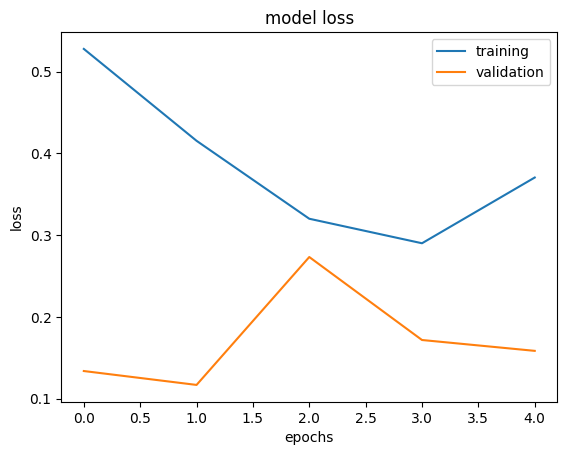

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='best')
plt.show()

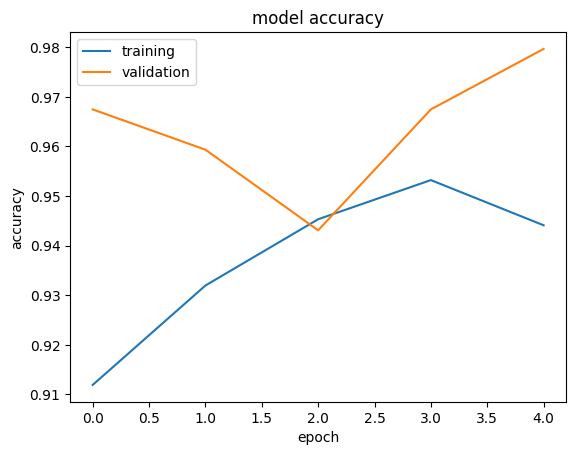

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel("accuracy")
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()

In [50]:
scores = model.evaluate(test_generator,steps=50)
print("Accuracy: ",scores[1]*100)
#print(scores)
precision = scores[2]
recall = scores[3]
F1Score = 2*precision*recall/(precision+recall)
print("F1-Score: ",F1Score)

results.add_row(["Xception", round(scores[1],3), round(precision,3), round(recall,3), round(F1Score,3)])

import pickle
pickle.dump(model,open('Xception.pkl','wb'))

11/50 [=====>........................] - ETA: 4s - loss: 0.1925 - accuracy: 0.9817 - precision: 0.9833 - recall: 0.9672

50/50 [==============================] - 1s 22ms/step - loss: 0.1925 - accuracy: 0.9817 - precision: 0.9833 - recall: 0.9672
Accuracy:  98.17073345184326
F1-Score:  0.9752066089566159


# Final Comparison

In [65]:
# final results
print(results)

+---------------------+----------+-----------+--------+---------+
|      Model Name     | Accuracy | Precision | Recall | F1Score |
+---------------------+----------+-----------+--------+---------+
|        VGG19        |  0.976   |   0.952   | 0.984  |  0.968  |
|        VGG16        |   0.97   |   0.924   |  1.0   |  0.961  |
|       ResNet50      |  0.616   |   0.464   | 0.213  |  0.292  |
|     Inception-V3    |  0.988   |   0.984   | 0.984  |  0.984  |
| Inception ResNet-V2 |  0.945   |    1.0    | 0.852  |   0.92  |
|       Xception      |  0.982   |   0.983   | 0.967  |  0.975  |
+---------------------+----------+-----------+--------+---------+
